# MODELO POBLACIÓN DEPEREDADOR PRESA

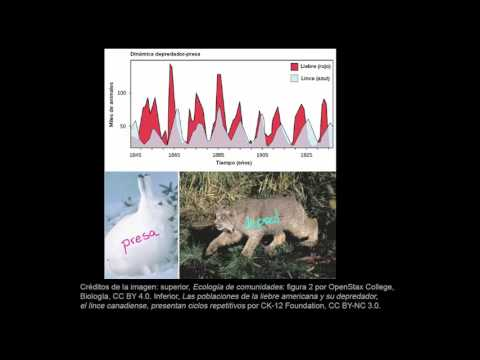

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('aPwy5-PPpS8')

$\frac{dR}{dt} = \alpha R - \beta R G$

$\frac{dG}{dt} = -\gamma G + \delta G R $

In [2]:
import numpy
import matplotlib.pyplot as pl
from numerico import *

In [3]:
def ecuacion(t, ci, a,b,c,d):
    drdt = a * ci[0] - b * ci[0] * ci[1]
    dgdt = -c * ci[1] + d * ci[0] * ci[1]
    return numpy.array([drdt, dgdt])

In [4]:
a = 2
b = 1.2
c = 1
d = 0.9
ci = numpy.array([1, 0.5])
solucion, tiempo = Euler(0, 15, ci, 0.01, ecuacion , a, b, c, d)


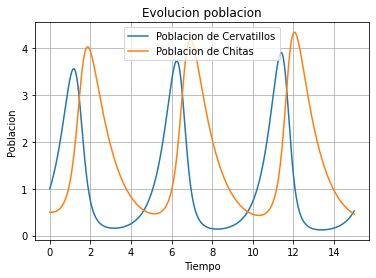

In [5]:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()

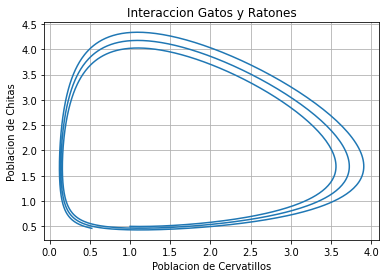

In [6]:
pl.plot(solucion[:,0], solucion[:,1])
pl.xlabel("Poblacion de Cervatillos")
pl.ylabel("Poblacion de Chitas")
pl.title("Interaccion Gatos y Ratones")
pl.grid()
pl.show()

# <font color="red">Ejercicio: Que ocurre si la presa tiene recursos limitados $N$ y existe una población de leones que también se come a los cerbatillos?</font>

Experimenta con los recursos limitados, las condiciones iniciales, y los parámetros. Para cada experimentación interpreta los datos generados

# <font color="GREEN"> ECUACIONES </font>

$\frac{dC}{dt}  = \alpha C   ( 1 - \frac{C}{N} )    - \beta C Ch - c C L $

$\frac{dCh}{dt} = - d Ch + e C Ch $

$\frac{dL}{dt}  = - f L + g C L $


$Donde:  
    C  = Cervatillos.     
    Ch = Chita.  
    L  = León.
    N = Recursos limitados $

# <font color="PURPLE"> Implementación  </font>

In [7]:
import numpy
import matplotlib.pyplot as pl
from numerico import *

def ecuacion(t, ci, a,b,c,d, e, f, N):
    dcdt = a * ci[0] *(1 - (ci[0]/N)) - b * ci[0] * ci[1] -c * ci[0] * ci[2]
    dchdt = -d * ci[1] + e * ci[0] * ci[1]
    dldt = -f * ci[2] + g * ci[0] * ci[2]
    return numpy.array([dcdt, dchdt, dldt])

SIMULACIÓN 1: AUSENCIA DE CERVATILLOS 
--------------------------

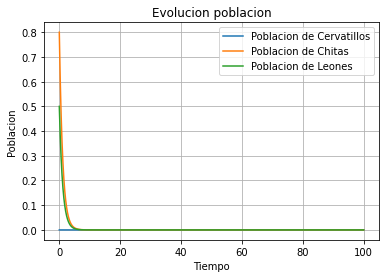

In [8]:
#PARAMETROS:
a = 2 # tasa de crecimiento de cervatillos
b = 1.2 # tasa de mortalidad del cervatillo respecto a las chitas
c = 1 # tasa de mortalidad del cervatillo respecto a los leones
d = 0.9 # tasa de decrecimiento de chitas
e = 0.8 # tasa de crecimiento de las chitas 
f = 0.9 # tasa de decrecimiento de leones
g = 0.8 # tasa de crecimiento de los leones
N = 1 # recursos limitados de los cervatillos (pasto)

#CONDICIONES INICIALES (Poblacion inicial):
C = 0
CH = 0.8
L = 0.5
ci = numpy.array([C, CH, L])

#EJECUCION:
solucion, tiempo = Euler(0, 100, ci, 0.01, ecuacion , a, b, c, d, e, f, N)

#GRAFICA:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.plot(tiempo, solucion[:,2], label="Poblacion de Leones")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()

### <font color="DARKBLUE"> Interpretación  </font>

    En la primera simulación, la cantidad inicial de Cervatillos en las condiciones tiene un valor de 0. 
    En la gráfica se puede observar el efecto del valor inicial de los Cervatillos, ya que al no existir presas, los 
    depredadores se ven afectados y se extinguen muy rápidamente.

SIMULACIÓN 2: ALTA POBLACIÓN Y CRECIMIENTO DE CERVATILLOS
--------------------------

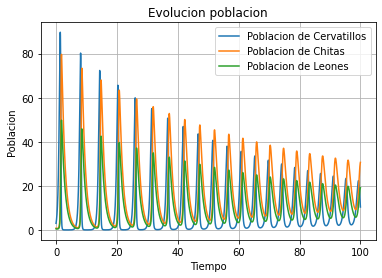

In [9]:
#PARAMETROS:
a = 3 # tasa de crecimiento de cervatillos
b = 0.1 # tasa de mortalidad del cervatillo respecto a las chitas
c = 0.1 # tasa de mortalidad del cervatillo respecto a los leones
d = 0.9 # tasa de decrecimiento de chitas
e = 0.1 # tasa de crecimiento de las chitas 
f = 0.9 # tasa de decrecimiento de leones
g = 0.1 # tasa de crecimiento de los leones
N = 500 # recursos limitados de los cervatillos (pasto)

#CONDICIONES INICIALES (Poblacion inicial):
C = 3
CH = 0.8
L = 0.5
ci = numpy.array([C, CH, L])

#EJECUCION:
solucion, tiempo = Euler(0, 100, ci, 0.01, ecuacion , a, b, c, d, e, f, N)

#GRAFICA:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.plot(tiempo, solucion[:,2], label="Poblacion de Leones")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()

### <font color="DARKBLUE"> Interpretación  </font>
    En esta simulación se presenta una convivencia equilibrada. Donde se tiene:
    - Una tasa alta de crecimiento de parte de los cervatillos. 
    - Tasas bajas de mortalidad respecto a sus depredadores.

    Los crecimientos de los depredadores y presas es un círculo vicioso donde si la población de cervatillos crece poco después crece las población de depredadores, y si las poblaciones de los depredadores crece baja drásticamente la población de cervatillos. Y asi sucesivamente hasta que con el tiempo estos crecimientos de dismuyen hasta regularse.

    Por otro lado, si bien los leones y las chitas tienen las mismas características reflejadas en los parámetros, se tiene una mayor cantidad de Chitas debido a las condiciones iniciales. (su cantidad es mayor al de los leones)

SIMULACIÓN 3: EXTINCIÓN DE LEONES
--------------------------

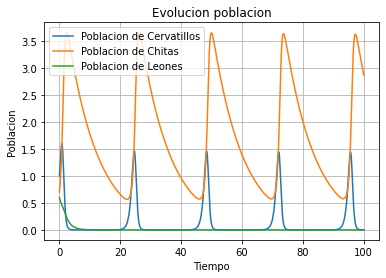

In [10]:
#PARAMETROS:
a = 2 # tasa de crecimiento de cervatillos
b = 1.2 # tasa de mortalidad del cervatillo respecto a las chitas
c = 0.3 # tasa de mortalidad del cervatillo respecto a los leones
d = 0.1 # tasa de decrecimiento de chitas
e = 0.8 # tasa de crecimiento de las chitas 
f = 0.6 # tasa de decrecimiento de leones
g = 0.2 # tasa de crecimiento de los leones
N = 100 # recursos limitados de los cervatillos (pasto)

#CONDICIONES INICIALES (Poblacion inicial):
C = 1
CH = 0.7
L = 0.6
ci = numpy.array([C, CH, L])

#EJECUCION:
solucion, tiempo = Euler(0, 100, ci, 0.01, ecuacion , a, b, c, d, e, f, N)

#GRAFICA:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.plot(tiempo, solucion[:,2], label="Poblacion de Leones")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()

### <font color="DARKBLUE"> Interpretación  </font>
    Para esta simulación entre lo más destacado se tiene en cuenta lo siguiente:
    - Una tasa alta de mortalidad del cervatillo respecto a las chitas
    - Una baja tasa de decrecimiento de las chitas

    Las chitas mantienen una alta población acorde al crecimiento de sus presas, pero los leones disminuye drásticamente hasta extinguirse debido que las chitas (debido a su cantidad) les quitan sus presas.

SIMULACIÓN 4: EXTINCIÓN DE LOS DEPREDADORES
-------------------

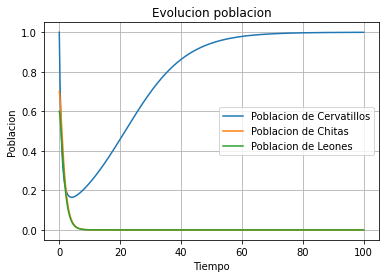

In [11]:
#PARAMETROS:
a = 0.1 # tasa de crecimiento de cervatillos
b = 0.9 # tasa de mortalidad del cervatillo respecto a las chitas
c = 1 # tasa de mortalidad del cervatillo respecto a los leones
d = 0.9 # tasa de decrecimiento de chitas
e = 0.8 # tasa de crecimiento de las chitas 
f = 0.9 # tasa de decrecimiento de leones
g = 0.8 # tasa de crecimiento de los leones
N = 1 # recursos limitados de los cervatillos (pasto)

#CONDICIONES INICIALES (Poblacion inicial):
C = 1
CH = 0.7
L = 0.6
ci = numpy.array([C, CH, L])

#EJECUCION:
solucion, tiempo = Euler(0, 100, ci, 0.01, ecuacion , a, b, c, d, e, f, N)

#GRAFICA:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.plot(tiempo, solucion[:,2], label="Poblacion de Leones")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()

### <font color="DARKBLUE"> Interpretación  </font>

    En la cuarta simulación, los datos de la tasa de mortalidad de los cervatillos respecto a los depredadores es alta, por lo cual los cervatillos llegan a reducir su población rápidamente, pero no se vuelven a reproducir rápidamente, lo cual provoca la extinción de los depredadores y el crecimiento de los cervatillos.

SIMULACIÓN 5: EQUILIBRIO CON BAJA POBLACIÓN DE DEPREDADORES
------------

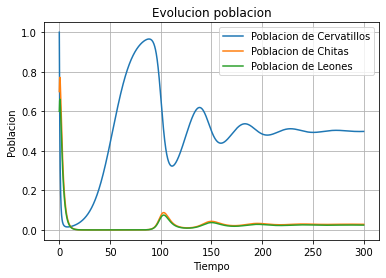

In [12]:
#PARAMETROS:
a = 0.1 # tasa de crecimiento de cervatillos
b = 0.9 # tasa de mortalidad del cervatillo respecto a las chitas
c = 1 # tasa de mortalidad del cervatillo respecto a los leones
d = 0.4 # tasa de decrecimiento de chitas
e = 0.8 # tasa de crecimiento de las chitas 
f = 0.4 # tasa de decrecimiento de leones
g = 0.8 # tasa de crecimiento de los leones
N = 1 # recursos limitados de los cervatillos (pasto)

#CONDICIONES INICIALES (Poblacion inicial):
C = 1
CH = 0.7
L = 0.6
ci = numpy.array([C, CH, L])

#EJECUCION:
solucion, tiempo = Euler(0, 300, ci, 0.01, ecuacion , a, b, c, d, e, f, N)

#GRAFICA:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.plot(tiempo, solucion[:,2], label="Poblacion de Leones")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()


### <font color="DARKBLUE"> Interpretación  </font>
    Tomando en cuenta:
        -una tasa de crecimiento baja para los cervatillos
        -tasa de decrecimiento baja para las chitas y leones
        -población de cervatillos igual a los recursos limitados
    Se puede observar que en un principio, debido a los recursos limitados de los cervatillos, más ser comidos por los depredadores, su población disminuye drásticamente. Al no haber presas, las poblaciones de ambos depredadores también disminuye, hasta casi extinguirse. Al no haber depredadores, la población de cervatillos crece nuevamente y de nuevo los depredadores comienzan a cazar e incrementar su población. Este patrón sucede varias veces, cada vez en menor proporción, hasta alcanzar una estabilidad con aproximadamente la mitad de la población de cervatillos iniciales, y una población baja de depredadores.

SIMULACIÓN 6: EQUILIBRIO -- RECURSOS LIMITADOS
------

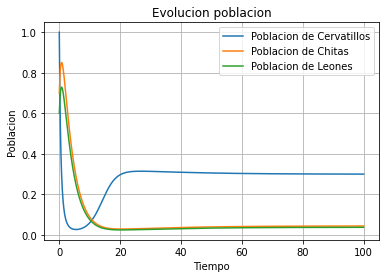

In [13]:
#PARAMETROS:
a = 0.5 # tasa de crecimiento de cervatillos
b = 1 # tasa de mortalidad del cervatillo respecto a las chitas
c = 0.7 # tasa de mortalidad del cervatillo respecto a los leones
d = 0.3 # tasa de decrecimiento de chitas
e = 1 # tasa de crecimiento de las chitas 
f = 0.3 # tasa de decrecimiento de leones
g = 1 # tasa de crecimiento de los leones
N = 0.35 # recursos limitados de los cervatillos (pasto)

#CONDICIONES INICIALES (Poblacion inicial):
C = 1
CH = 0.7
L = 0.6
ci = numpy.array([C, CH, L])

#EJECUCION:
solucion, tiempo = Euler(0, 100, ci, 0.01, ecuacion , a, b, c, d, e, f, N)

#GRAFICA:
pl.plot(tiempo, solucion[:,0], label="Poblacion de Cervatillos")
pl.plot(tiempo, solucion[:,1], label="Poblacion de Chitas")
pl.plot(tiempo, solucion[:,2], label="Poblacion de Leones")
pl.xlabel("Tiempo")
pl.ylabel("Poblacion")
pl.title("Evolucion poblacion")
pl.grid()
pl.legend()
pl.show()


### <font color="DARKBLUE"> Interpretación  </font>
    Tomando en cuenta:
        -una tasa de mortalidad mayor a la tasa de crecimiento para los cervatillos
        -tasas de decrecimiento bajas y de crecimiento altas para ambos depredadores
        -recursos limitados bajos para los cervatillos
    Comenzando con una población de cervatillos que supera estos recursos, se observa que la tasa de cervatillos baja drásticamente y la de los depredadores sube un poco y después baja por la poca población de presa. Ahora que no hay muchos depredadores, la población de cervatillos vuelve a incrementar, pero solo hasta llegar a los recursos limitados, donde se mantiene constante. Las poblaciones de depredadores también se mantienen constantes con un nivel bajo de población.